In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('..\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [308]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/My Drive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
item_categories = pd.read_csv(path+"/input/item_categories.csv")
items = pd.read_csv(path+"/input/items.csv")
shops = pd.read_csv(path+"/input/shops.csv")
train_original = pd.read_csv(path+"/input/sales_train.csv.gz")
test = pd.read_csv(path+"/input/test.csv.gz")
train = train_original.copy()

In [375]:
print("Item categories")
print(item_categories.head(10))
print("\nItems")
print(items.head(10))
print("\nShops")
print(shops.head(10))
print("\nTrain set")
print(train.head(10))
print("\nTest set")
print(test.head(10))

Item categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9

Items
                                           item_name  item_id  item_category_id
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0                40
1  !ABBYY FineReader 12 Professional Edition Full...        1                76
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2                40
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3                40
4        ***КОРОБКА (СТЕКЛО)                       D        4                40
5 

In [376]:
print(train.info())
print(train.describe())
print(train.item_cnt_day.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e

In [0]:
#print(item_categories.head(70))
#category_tags = ['Аксессуары','Игры PC','Карты оплаты','Кино ','Книги','Музыка','Подарки','Программы','Служебные','Чистые носители']
#all_categories = []
#for tag in category_tags:
#  all_categories.append(list(item_categories[item_categories['item_category_name'].str.contains(tag)]['item_category_id']))
#item_categories_simplify_dict = {i:i for i in range(84)}
#for category in all_categories:
#  for i in category:
#    item_categories_simplify_dict[i] = category[0]
#print(item_categories_simplify_dict)
#print(set(item_categories_simplify_dict.values()))

In [0]:
shops.shop_name = shops.shop_name.str.strip('!"')
name_tags = [set(a[0] for a in shops.shop_name.str.split())][0]
all_categories = []
for tag in name_tags:
  all_categories.append(list(shops[shops['shop_name'].str.contains(tag)]['shop_id']))
shop_names_simplify_dict = {i:i for i in range(84)}
for category in all_categories:
  for i in category:
    shop_names_simplify_dict[i] = category[0]#shops.head(90)

In [379]:
train.sort_values(by=['date']).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
16164,01.01.2013,0,28,11613,1499.0,1.0
101474,01.01.2013,0,51,10283,667.0,1.0
10197,01.01.2013,0,19,2828,499.0,1.0
101457,01.01.2013,0,51,10390,150.0,1.0
101455,01.01.2013,0,51,10591,110.0,1.0


In [0]:
item_to_cat = {}
for idx, row in items.iterrows():
    #print(row)
    item_to_cat[row.item_id] = row.item_category_id
cat_id_to_name = {}
for idx, row in item_categories.iterrows():
    cat_id_to_name[row.item_category_id] = row.item_category_name

In [0]:
default_category_idx = len(item_categories)

In [0]:
train['item_category_id_'] = train['item_id'].map(item_to_cat)
train['item_category_id'] = train['item_category_id_']#.map(item_categories_simplify_dict)
#train['shop_id'] = train['shop_id'].map(shop_names_simplify_dict)

In [0]:
new_train = train[['date_block_num','shop_id','item_id','item_category_id','item_cnt_day','item_price']]

In [384]:
print(new_train.head(10))

   date_block_num  shop_id  item_id  item_category_id  item_cnt_day  item_price
0               0       59    22154                37           1.0      999.00
1               0       25     2552                58           1.0      899.00
2               0       25     2552                58          -1.0      899.00
3               0       25     2554                58           1.0     1709.05
4               0       25     2555                56           1.0     1099.00
5               0       25     2564                59           1.0      349.00
6               0       25     2565                56           1.0      549.00
7               0       25     2572                55           1.0      239.00
8               0       25     2572                55           1.0      299.00
9               0       25     2573                55           3.0      299.00


In [0]:
processing_train = pd.DataFrame(new_train.groupby(['date_block_num','item_category_id'])['item_cnt_day'].sum().reset_index())

In [386]:
print(processing_train)

      date_block_num  item_category_id  item_cnt_day
0                  0                 0           1.0
1                  0                 1           1.0
2                  0                 2        1390.0
3                  0                 3         440.0
4                  0                 4         251.0
...              ...               ...           ...
2072              33                76         184.0
2073              33                77          64.0
2074              33                78          64.0
2075              33                79         521.0
2076              33                83         348.0

[2077 rows x 3 columns]


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
processing_train['category'] = processing_train['item_category_id'].map(cat_id_to_name)
for i in range(0,84,8):
    pass
    #processed = processing_train[(processing_train.item_category_id >= i ) & (processing_train.item_category_id < i+8)]
    #g = sns.FacetGrid(processed, col="category", col_wrap=4, height=3)
    #g.map(sns.lineplot, "date_block_num", "item_cnt_day", color=".3", ci=None);


In [0]:
processing_train_2 = pd.DataFrame(new_train.groupby(['date_block_num','shop_id'])['item_cnt_day'].sum().reset_index())

In [0]:
for i in range(0,61,8):
    pass
    #processed = processing_train_2[(processing_train_2.shop_id >= i) & (processing_train_2.shop_id < i+8)]
    #g = sns.FacetGrid(processed, col="shop_id", col_wrap=4, height=3)
    #g.map(sns.lineplot, "date_block_num", "item_cnt_day", color=".3", ci=None);


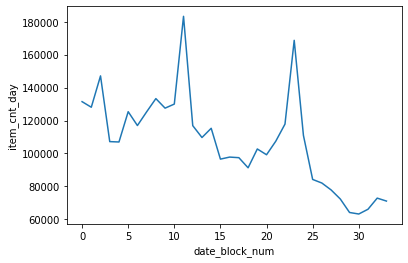

In [391]:
processing_train_3 = pd.DataFrame(new_train.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index())
sns.lineplot(x='date_block_num',y='item_cnt_day',data=processing_train_3)

In [392]:
for c in new_train:
    print(f"NANs in {c}:{new_train[c].isnull().sum()}")

NANs in date_block_num:0
NANs in shop_id:0
NANs in item_id:0
NANs in item_category_id:0
NANs in item_cnt_day:0
NANs in item_price:0


In [393]:
new_train.head()

,date_block_num,shop_id,item_id,item_category_id,item_cnt_day,item_price
0,0,59,22154,37,1.0,999.00
1,0,25,2552,58,1.0,899.00
2,0,25,2552,58,-1.0,899.00
3,0,25,2554,58,1.0,1709.05
4,0,25,2555,56,1.0,1099.00


In [394]:
new_train['month_value'] = (new_train['date_block_num'] % 12)/11

"""
month_value_name_map = {
    0:'January',
    1:'February',
    2:'March',
    3:'April',
    4:'May',
    5:'June',
    6:'July',
    7:'August',
    8:'September',
    9:'October',
    10:'November',
    11:'December'
}
new_train.month_value = new_train.month_value.map(month_value_name_map)
"""
new_train.month_value.value_counts()

#new_train = pd.get_dummies(new_train, columns = ['month_value'], prefix='month_')
new_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date_block_num,shop_id,item_id,item_category_id,item_cnt_day,item_price,month_value
0,0,59,22154,37,1.0,999.00,0.0
1,0,25,2552,58,1.0,899.00,0.0
2,0,25,2552,58,-1.0,899.00,0.0
3,0,25,2554,58,1.0,1709.05,0.0
4,0,25,2555,56,1.0,1099.00,0.0


In [395]:
negativeValues = new_train[new_train['item_cnt_day'] < 0].index
new_train.drop(negativeValues, inplace=True)
new_train['date_block_num'] = new_train['date_block_num']/34

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#month_cols = ['month__'+ v for v in month_value_name_map.values()]
grouped_train = pd.DataFrame(new_train.groupby(['date_block_num','shop_id','item_id','item_category_id','month_value','item_price'])['item_cnt_day'].sum().reset_index())

In [397]:
grouped_train.shape

(1737866, 7)

In [398]:
grouped_train.head()

,date_block_num,shop_id,item_id,item_category_id,month_value,item_price,item_cnt_day
0,0.0,0,32,40,0.0,221.0,6.0
1,0.0,0,33,37,0.0,347.0,3.0
2,0.0,0,35,40,0.0,247.0,1.0
3,0.0,0,43,40,0.0,221.0,1.0
4,0.0,0,51,57,0.0,127.0,1.0


In [399]:
cat_enc = OneHotEncoder()
transformed = ['item_category_id', 'shop_id']
cat_enc.fit(grouped_train[transformed])
transformed_train = pd.DataFrame(data=cat_enc.transform(grouped_train[transformed]).toarray())
transformed_train = pd.concat([grouped_train, transformed_train],axis=1)
print(transformed_train.head())

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


   date_block_num  shop_id  item_id  item_category_id  ...  140  141  142  143
0             0.0        0       32                40  ...  0.0  0.0  0.0  0.0
1             0.0        0       33                37  ...  0.0  0.0  0.0  0.0
2             0.0        0       35                40  ...  0.0  0.0  0.0  0.0
3             0.0        0       43                40  ...  0.0  0.0  0.0  0.0
4             0.0        0       51                57  ...  0.0  0.0  0.0  0.0

[5 rows x 151 columns]


In [0]:
columns = ['date_block_num','month_value','item_price'] + list(i for i in range(144))
non_cat_columns = ['date_block_num','item_price']

price_scaler = StandardScaler()
y_scaler = StandardScaler()

train_prices = np.asarray(transformed_train['item_price'].sample(frac=1)).reshape(-1,1)
price_scaler.fit(train_prices)
transformed_train['item_price'] = price_scaler.transform(train_prices)

X_train, X_test, y_train, y_test = train_test_split(transformed_train[columns], transformed_train['item_cnt_day'], test_size=0.15, random_state=42)
y_scaler.fit(np.asarray(y_train).reshape(-1,1))
y_train = y_scaler.transform(np.asarray(y_train).reshape(-1,1))
y_test = y_scaler.transform(np.asarray(y_test).reshape(-1,1))

In [402]:
print(X_test.head())
print(y_train[:10])

         date_block_num  month_value  item_price    0  ...  140  141  142  143
192703         0.058824     0.181818    0.264285  0.0  ...  0.0  0.0  0.0  0.0
696495         0.323529     1.000000   -0.404896  0.0  ...  0.0  0.0  0.0  0.0
829725         0.382353     0.090909   -0.346706  0.0  ...  0.0  0.0  0.0  0.0
1373740        0.705882     0.000000   -0.346706  0.0  ...  0.0  0.0  0.0  0.0
1451856        0.764706     0.181818   -0.201232  0.0  ...  0.0  0.0  0.0  0.0

[5 rows x 147 columns]
[[-0.14738061]
 [-0.14738061]
 [ 0.38738799]
 [-0.01368846]
 [-0.01368846]
 [-0.14738061]
 [-0.14738061]
 [-0.14738061]
 [-0.14738061]
 [-0.14738061]]


In [403]:
X_dev = test
#X_dev.drop('ID',inplace=True, axis=1)
X_dev['date_block_num'] = 1
X_dev['month_value'] = 10/11
X_dev['item_category_id'] = X_dev['item_id'].map(item_to_cat)
#X_dev['item_category_id'] = X_dev['item_category_id'].map(item_categories_simplify_dict)
#X_dev['shop_id'] = X_dev['shop_id'].map(shop_names_simplify_dict)
X_dev.head()

,ID,shop_id,item_id,date_block_num,month_value,item_category_id
0,0,5,5037,1,0.909091,19
1,1,5,5320,1,0.909091,55
2,2,5,5233,1,0.909091,19
3,3,5,5232,1,0.909091,23
4,4,5,5268,1,0.909091,20


In [404]:
mean_prices=pd.DataFrame(new_train.groupby(['item_id'])['item_price'].mean().reset_index())
mean_prices_for_cat = pd.DataFrame(train.groupby(['item_category_id_'])['item_price'].mean().reset_index())
print(mean_prices_for_cat)
def get_price_for_id(item_id, item_category_id):
  try:
    return float(mean_prices[mean_prices.item_id == item_id].item_price)
  except:
    #print(mean_prices_for_cat[mean_prices_for_cat.item_category_id == item_category_id].item_price)
    return float(mean_prices_for_cat[mean_prices_for_cat.item_category_id_ == item_category_id].item_price)

item_ids = list(X_dev.item_id.unique())
id_to_price = {}
for item_id in item_ids:
    item_category = item_to_cat.get(item_id)
    id_to_price[item_id] = get_price_for_id(item_id, item_category)
X_dev['item_price'] = X_dev['item_id'].map(id_to_price)
dev_prices = np.asarray(X_dev['item_price']).reshape(-1,1)
dev_prices = price_scaler.transform(dev_prices)
X_dev['item_price'] = dev_prices
X_dev.head()

    item_category_id_   item_price
0                   0    87.800000
1                   1   215.500000
2                   2  2261.705152
3                   3  2105.683642
4                   4   554.696081
..                ...          ...
79                 79  1094.625747
80                 80  1246.064128
81                 81   189.050314
82                 82    32.481014
83                 83   100.280925

[84 rows x 2 columns]


,ID,shop_id,item_id,date_block_num,month_value,item_category_id,item_price
0,0,5,5037,1,0.909091,19,1923.611577
1,1,5,5320,1,0.909091,55,286.209370
2,2,5,5233,1,0.909091,19,800.777500
3,3,5,5232,1,0.909091,23,787.346357
4,4,5,5268,1,0.909091,20,2791.779820


In [405]:
transformed = ['item_category_id','shop_id']
#print(X_dev[transformed])
transformed_test = pd.DataFrame(data=cat_enc.transform(X_dev[transformed]).toarray())
transformed_test = pd.concat([X_dev, transformed_test],axis=1)
transformed_test.head()

,ID,shop_id,item_id,date_block_num,month_value,item_category_id,item_price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
0,0,5,5037,1,0.909091,19,1923.611577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5320,1,0.909091,55,286.209370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,1,0.909091,19,800.777500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,5232,1,0.909091,23,787.346357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,5268,1,0.909091,20,2791.779820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
X_predict = transformed_test[columns]
X_predict.head()

,date_block_num,month_value,item_price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
0,1,0.909091,1923.611577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.909091,286.209370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.909091,800.777500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.909091,787.346357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.909091,2791.779820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [407]:
from sklearn import linear_model
from sklearn import metrics

print("Meetodi parameetrite loetelu koos vaikeväärtustega:")
print(linear_model.LinearRegression())

print()
# Loome mudeli
regr = linear_model.LinearRegression()
# Õpetame mudelit
regr.fit(X_train, y_train)

Meetodi parameetrite loetelu koos vaikeväärtustega:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [408]:
# Kasutame mudelit testkorpuse andmete põhjal ennustamisel
y_test_predict = regr.predict(X_test)
# Arvutame skoori ja keskmise absoluutvea (MAE)
print("LinearRegression täpsus:", regr.score(X_test, y_test))
print("Keskmine viga:",metrics.mean_squared_error(y_test, y_test_predict))
print(X_predict.head())

LinearRegression täpsus: -598190434349603.1
Keskmine viga: 752517859450750.5
   date_block_num  month_value   item_price    0    1  ...  139  140  141  142  143
0               1     0.909091  1923.611577  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
1               1     0.909091   286.209370  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
2               1     0.909091   800.777500  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
3               1     0.909091   787.346357  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
4               1     0.909091  2791.779820  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 147 columns]


In [409]:
print(y_test_predict[:10])
print(y_test[:10])

[[ 0.05366516]
 [-0.07971191]
 [ 0.28125763]
 [ 0.01003265]
 [-0.01111603]
 [-0.11153412]
 [-0.10657501]
 [-0.02429962]
 [ 0.0881424 ]
 [ 0.16331482]]
[[-0.14738061]
 [-0.14738061]
 [-0.14738061]
 [-0.14738061]
 [-0.14738061]
 [-0.14738061]
 [ 0.52108014]
 [ 0.12000369]
 [-0.14738061]
 [-0.01368846]]


In [0]:
from keras.layers import Dense, Input, BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.models import load_model

def model(inputshape,loss,opt,activation):
  mdl= Sequential()

  mdl.add(Dense(inputshape, activation=activation, input_shape=(inputshape,)))
  mdl.add(BatchNormalization())
  mdl.add(Dense(inputshape,activation=activation))
  mdl.add(BatchNormalization())
  mdl.add(Dense(inputshape,activation=activation))
  mdl.add(BatchNormalization())
  mdl.add(Dense(12,activation=activation))
  mdl.add(BatchNormalization())
  mdl.add(Dense(1,activation=activation))
  
  mdl.compile(loss=loss, optimizer=opt)
  return mdl

In [422]:
inputshape = X_train.shape[1]
mdl = model(inputshape, "mean_squared_error","Adam",'relu')
hist = mdl.fit(X_train, y_train, epochs=8, batch_size=512,validation_data = (X_test, y_test))
print(X_predict.shape)

#print(y_pred[i][0], '-', cat_enc.inverse_transform(predictions)[i])

Train on 1477186 samples, validate on 260680 samples
Epoch 1/8
1477186/1477186 [==============================] - 50s 34us/step - loss: 0.6814 - val_loss: 1.1789
Epoch 2/8
1477186/1477186 [==============================] - 43s 29us/step - loss: 0.5844 - val_loss: 0.9835
Epoch 3/8
1477186/1477186 [==============================] - 43s 29us/step - loss: 0.5678 - val_loss: 1.6968
Epoch 4/8
1477186/1477186 [==============================] - 43s 29us/step - loss: 0.5628 - val_loss: 1.6173
Epoch 5/8
1477186/1477186 [==============================] - 43s 29us/step - loss: 0.5459 - val_loss: 0.9854
Epoch 6/8
1477186/1477186 [==============================] - 44s 30us/step - loss: 0.5353 - val_loss: 1.3714
Epoch 7/8
1477186/1477186 [==============================] - 43s 29us/step - loss: 0.5329 - val_loss: 0.8429
Epoch 8/8
1477186/1477186 [==============================] - 43s 29us/step - loss: 0.5243 - val_loss: 0.9944
(214200, 147)


In [0]:
#X_predict.drop(['item_cnt_month_predict'],axis=1,inplace=True)
y_pred = mdl.predict(X_predict)

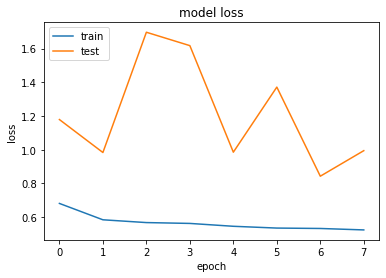

In [424]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [425]:
print(y_pred[:10])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
y_pred = y_scaler.inverse_transform(y_pred)

In [427]:
print(y_pred)

[[2.102388]
 [2.102388]
 [2.102388]
 ...
 [2.102388]
 [2.102388]
 [2.102388]]


In [428]:
y_pred.max()

594.89154

In [0]:
example = pd.read_csv(path + '/input/sample_submission.csv.gz')

In [430]:
example.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [0]:
example['item_cnt_month'] = y_pred

In [432]:
example.head()

,ID,item_cnt_month
0,0,2.102388
1,1,2.102388
2,2,2.102388
3,3,2.102388
4,4,2.102388


In [0]:
example.to_csv(path+'/input/output.csv',index=False)